In [42]:
%matplotlib inline

import json

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

network = json.load(open("data/wikipedia-geometry/network.json","r"))
specialization = json.load(open("data/wikipedia-geometry/specialization.json"))

# print network

print len(network["nodes"])


321


In [16]:
print len(specialization)

140


In [35]:
# for n in network["nodes"]:
#     titles.append(n["id"])

table = pd.DataFrame(specialization)
    
table.head()

,number.of.backlinks,number.of.backlinks.from.ns.0,number.of.categories,number.of.links,number.of.revisions,number.of.revisions.by.IP,number.of.revisions.by.alive.registered.user,pagename,quality.of.the.article,specialization
0,0,0,7,403,370,124,246,2D computer graphics,4,0.1909
1,0,0,8,195,893,368,525,3D computer graphics,4,0.0627
2,0,0,7,116,277,59,218,3-sphere,4,0.3721
3,0,0,1,97,205,40,165,Affine geometry,3,0.3904
4,1375,1009,1,379,626,189,437,Algebraic geometry,4,0.1887


### raw distribution of specialization

array([[<matplotlib.axes.AxesSubplot object at 0x10ab02350>]], dtype=object)

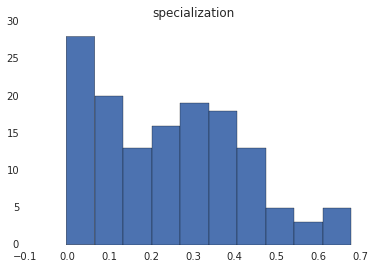

In [55]:
table.hist("specialization")

### links x specialization

array([[<matplotlib.axes.AxesSubplot object at 0x10b180390>]], dtype=object)

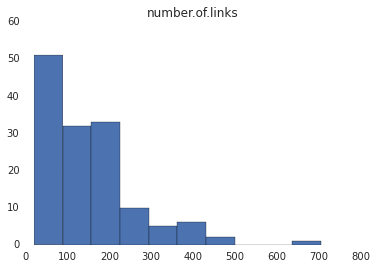

In [62]:
table.hist("number.of.links")

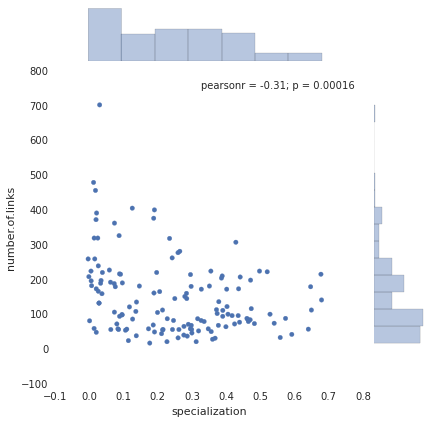

In [44]:
sns.jointplot(table.specialization, table["number.of.links"])

### specialization x backlinks

array([[<matplotlib.axes.AxesSubplot object at 0x10abe5a50>]], dtype=object)

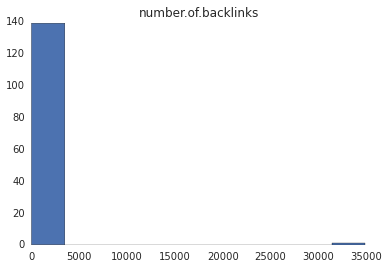

In [56]:
table.hist("number.of.backlinks")

OverflowError: cannot convert float infinity to integer

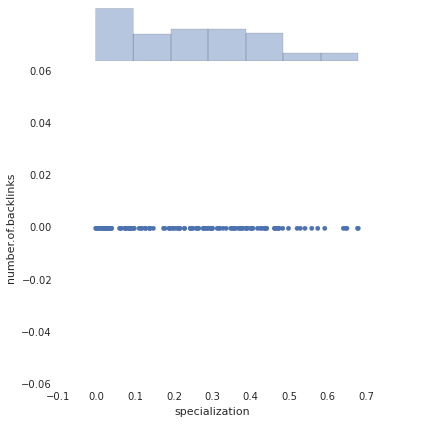

In [48]:
sns.jointplot(table.specialization, table["number.of.backlinks"])